# Extracting key information from documents

It is tough to read and retrieve informarion manually from documents. So, this project is an attempt to automate this process.

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import re    # for regular expressions
import numpy as np 
import pickle
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 
                   'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [6]:
! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.2.0/en_core_web_md-2.2.0.tar.gz

     |████████████████████████████████| 96.4MB 93kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.0-cp36-none-any.whl size=98072933 sha256=617fecb2e9fc70c9c25d408ba4a6430db81a8af03b64f8239475fb8546037c6d
  Stored in directory: /root/.cache/pip/wheels/5f/3e/c9/36dd6e13b449fd84cd1f94b72dfbc559daf09f53dbf4e697a3
Successfully built en-core-web-md


In [0]:
# more text related modules
import spacy 
import en_core_web_md
nlp = en_core_web_md.load()

I personally like Spacy more than nltk. But, I never take sides so, I ll use both where they come handy

In [0]:
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

In [9]:
! pip install version_information

In [10]:
%reload_ext version_information
%version_information pandas,numpy, nltk, seaborn, matplotlib, re, PyPDF2,gensim, spacy, bokeh

Software,Version
Python,3.6.9 64bit [GCC 8.3.0]
IPython,5.5.0
OS,Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas,0.25.3
numpy,1.17.4
nltk,3.2.5
seaborn,0.9.0
matplotlib,3.1.2
re,2.2.1
PyPDF2,The 'PyPDF2' distribution was not found and is required by the application


# 2)- Loading Dataset

from kaggle : https://www.kaggle.com/benhamner/nips-papers/data

In [11]:
! pip install kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hassansherwani","key":"a1ac088054bfd5d79730da00710c5b13"}'}

In [0]:
#Kaggle API client
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

# This permission change avoids a warning on kaggle tool startup.

! chmod 600 ~/.kaggle/kaggle.json

In [14]:
# import data from kaggle API

! kaggle datasets download -d benhamner/nips-papers

nips-papers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!unzip nips-papers.zip

Archive:  nips-papers.zip
replace authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: authors.csv             
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: database.sqlite         
replace paper_authors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: paper_authors.csv       
replace papers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: papers.csv              


In [16]:
data=pd.read_csv('papers.csv')
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [17]:
data.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [19]:
data.shape

(7241, 7)

In [0]:
# we shall create a smaller dataset with our features of interest

dataset= data[['id','year','title','abstract','paper_text']]

In [21]:
dataset.shape

(7241, 5)

In [22]:
dataset.head()

,id,year,title,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [23]:
dataset.tail()

,id,year,title,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


# 3)- data exploration

### 3.1)-Number of published papers per year

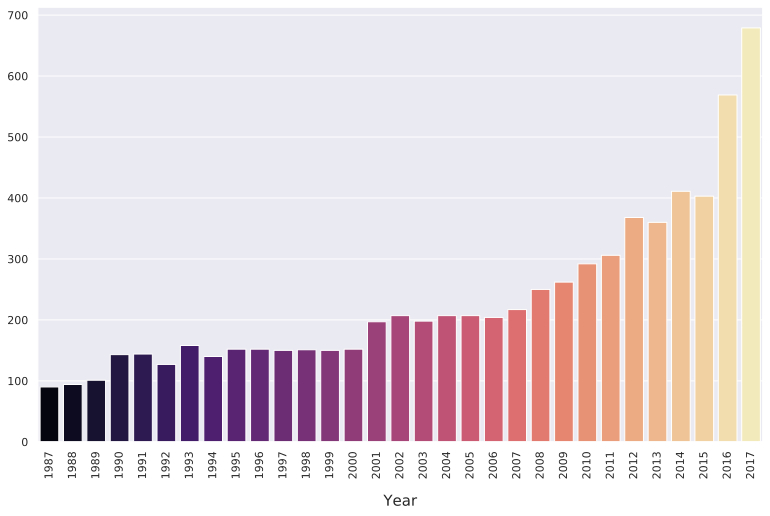

In [24]:
groups = dataset.groupby('year')
counts = groups.size()

plt.figure(figsize = (13, 8))
ax = sns.barplot(counts.index, counts.values, palette=("magma"))
ax.set_xlabel("Year",fontsize = 15, labelpad = 15)
plt.xticks(rotation = 90)
plt.show()

This graph shows how amount of papers are being accumulted over the years. Recent years have seen an increase in publication and it is a nice trend to consider for further analysis.

### 3.2)- Word count for text

In [25]:
#Fetch wordcount for each text document
dataset['w_count'] = dataset['paper_text'].apply(lambda x: len(str(x).split(" ")))
dataset[['paper_text','w_count']].head(10)

,paper_text,w_count
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727
3,Bayesian Query Construction for Neural\nNetwor...,2923
4,"Neural Network Ensembles, Cross\nValidation, a...",3009
5,U sing a neural net to instantiate a\ndeformab...,3335
6,Plasticity-Mediated Competitive Learning\n\nTe...,1659
7,ICEG Morphology Classification using an\nAnalo...,2470
8,Real-Time Control of a Tokamak Plasma\nUsing N...,2397
9,Real-Time Control of a Tokamak Plasma\nUsing N...,4283


In [26]:
dataset[['paper_text','w_count']].tail(10)

,paper_text,w_count
7231,695\n\nANALOG IMPLEMENTATION OF SHUNTING\nNEUR...,1749
7232,Comparing the prediction accuracy of\nartifici...,4561
7233,Stochastic Dynamics of Three-State\nNeural Net...,1673
7234,Grouping Components of\n?\nThree-Dimensional M...,1213
7235,Visual Speech Recognition with\nStochastic Net...,2391
7236,Single Transistor Learning Synapses\n\nPaul Ha...,2639
7237,"Bias, Variance and the Combination of\nLeast S...",3611
7238,A Real Time Clustering CMOS\nNeural Engine\nT....,2016
7239,Learning direction in global motion: two\nclas...,2818
7240,Correlation and Interpolation Networks for\nRe...,3075


In [27]:
##Descriptive statistics of word counts

dataset.w_count.describe()

count     7241.000000
mean      4259.252037
std       1237.864868
min          1.000000
25%       3211.000000
50%       4473.000000
75%       5194.000000
max      11519.000000
Name: w_count, dtype: float64

**Some insight from above:**

- Average word count in our text document is 4259 words per document. The word count ranges from a minimum of 1 word to maximum of 11519 words. This is useful information in a sense that it indicates size of dataset and also variation in word count across the rows
    
    
    

### 3.3)- Most common and uncommon words

A peek into the most common words gives insights not only on the frequently used words but also words that could also be potential data specific stop words. A comparison of the most common words and the default English stop words will give us a list of words that need to be added to a custom stop word list.

In [28]:
#Identify top 20 most common/frequently occuring words
common = pd.Series(' '.join(dataset['paper_text']).split()).value_counts()[:20]
common

the     1741341
of       992459
and      737835
?        643837
a        585149
to       565402
is       496162
in       472178
for      350809
that     291198
=        282147
,        226448
we       226390
with     223759
The      208088
on       193614
.        190768
by       184927
are      182535
as       181125
dtype: int64

Most of them are stop words and if we remove them then our data will be lighter. Also they are not contributing towards meaning of document so, removing them won't take away any useful information

In [29]:
#Identify top 20 uncommon words
uncommon=pd.Series(' '.join(dataset['paper_text']).split()).value_counts()[-20:]
uncommon

Lnj(t)oo~         1
null;null;null    1
103.64            1
J.P.S.,           1
x?Nd              1
'repeat'          1
Pa[xt             1
a/(               1
smoohting         1
{O,1}             1
defintion,        1
0n+l              1
hOllnd            1
(4-1)             1
##""            1
lin:              1
0,,(              1
Y(klk             1
d-values.         1
Pdi=Pbc(Bm,       1
dtype: int64

Some of these words are non-sense strings and we can drop them as well and there won't be any change in meaning of document.

# 4)- Text Preprocessing

### 4.1)- Text intution 

In [30]:
docu=dataset['paper_text']
chars=list(set(docu))

data_size, vocab_size = len(docu), len(chars)
print ("Contract data has chars", data_size)
print ("Contract data has unique chars", vocab_size)

Contract data has chars 7241
Contract data has unique chars 7237


In [31]:
type(docu)

pandas.core.series.Series

### 4.2)- Tokenize sentence

In [0]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove extra characters
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [33]:
# Convert to list
data = dataset.paper_text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['self', 'organization', 'of', 'associative', 'database', 'and', 'its', 'applications', 'hisashi', 'suzuki', 'and', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'an', 'efficient', 'method', 'of', 'self', 'organizing', 'associative', 'databases', 'is', 'proposed', 'together', 'with', 'applications', 'to', 'robot', 'eyesight', 'systems', 'the', 'proposed', 'databases', 'can', 'associate', 'any', 'input', 'with', 'some', 'output', 'in', 'the', 'first', 'half', 'part', 'of', 'discussion', 'an', 'algorithm', 'of', 'self', 'organization', 'is', 'proposed', 'from', 'an', 'aspect', 'of', 'hardware', 'it', 'produces', 'new', 'style', 'of', 'neural', 'network', 'in', 'the', 'latter', 'half', 'part', 'an', 'applicability', 'to', 'handwritten', 'letter', 'recognition', 'and', 'that', 'to', 'an', 'autonomous', 'mobile', 'robot', 'system', 'are', 'demonstrated', 'introduction', 'let', 'mapping', 'be', 'given', 'here', 'is', 'finite', 'or', 'infinite', 'set',

In [34]:
print(data_words[2])

['storing', 'covariance', 'by', 'the', 'associative', 'long', 'term', 'potentiation', 'and', 'depression', 'of', 'synaptic', 'strengths', 'in', 'the', 'hippocampus', 'patric', 'stanton', 'and', 'terrence', 'sejnowski', 'department', 'of', 'biophysics', 'johns', 'hopkins', 'university', 'baltimore', 'md', 'abstract', 'in', 'modeling', 'studies', 'or', 'memory', 'based', 'on', 'neural', 'networks', 'both', 'the', 'selective', 'enhancement', 'and', 'depression', 'or', 'synaptic', 'strengths', 'are', 'required', 'ror', 'effident', 'storage', 'or', 'inrormation', 'sejnowski', 'kohonen', 'bienenstock', 'et', 'ai', 'sejnowski', 'and', 'tesauro', 'we', 'have', 'tested', 'this', 'assumption', 'in', 'the', 'hippocampus', 'cortical', 'structure', 'or', 'the', 'brain', 'that', 'is', 'involved', 'in', 'long', 'term', 'memory', 'brier', 'high', 'frequency', 'activation', 'or', 'excitatory', 'synapses', 'in', 'the', 'hippocampus', 'produces', 'an', 'increase', 'in', 'synaptic', 'strength', 'known', '

In [35]:
len(data_words[2])

2687

In [36]:
len(data_words)

7241

### 4.3)- More Cleaning

Remove extra words <br>
Remove anything but word contain a-z sequence <br>
Normalize data i.e Lemma

In [43]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
clean_text = [] # defining corpus
for i in range(0, len(dataset['paper_text'])): # giving range of values from 0 to end point of dataset i.e 7241
    processed_text = re.sub('[^a-zA-Z]', ' ', dataset['paper_text'][i]) # using i for all values instead of 1 column
    processed_text = processed_text.lower()
    processed_text = processed_text.split()
    lemm = WordNetLemmatizer()
    stopword_set = set(stopwords.words('english'))
    processed_text = [lemm.lemmatize(word) for word in processed_text if not word in stopword_set]
    processed_text = ' '.join(processed_text )
    clean_text.append(processed_text) # finally attach all these cleaned values to corpus directory

In [0]:
# remove digits for double safety

# Remove numbers
data_ready = [word for word in clean_text if not word.isnumeric()]

In [46]:
type(data_ready)

list

In [0]:
# convert to series to check words
text_corpus = pd.Series(clean_text)

In [49]:
dataset['clean_text'] = text_corpus
dataset.head()

,id,year,title,abstract,paper_text,w_count,clean_text
0,1,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315,self organization associative database applica...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233,mean field theory layer iv visual cortex appli...
2,100,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727,storing covariance associative long term poten...
3,1000,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,2923,bayesian query construction neural network mod...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",3009,neural network ensemble cross validation activ...


# 5)-Pre-Model step

### 5.1)- Create Dictionary

In [60]:
# make series into tokenized list to make id2word. 
data = dataset.clean_text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['self', 'organization', 'associative', 'database', 'application', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'efficient', 'method', 'self', 'organizing', 'associative', 'database', 'proposed', 'together', 'application', 'robot', 'eyesight', 'system', 'proposed', 'database', 'associate', 'input', 'output', 'first', 'half', 'part', 'discussion', 'algorithm', 'self', 'organization', 'proposed', 'aspect', 'hardware', 'produce', 'new', 'style', 'neural', 'network', 'latter', 'half', 'part', 'applicability', 'handwritten', 'letter', 'recognition', 'autonomous', 'mobile', 'robot', 'system', 'demonstrated', 'introduction', 'let', 'mapping', 'given', 'finite', 'infinite', 'set', 'another', 'finite', 'infinite', 'set', 'learning', 'machine', 'observes', 'set', 'pair', 'sampled', 'randomly', 'mean', 'cartesian', 'product', 'computes', 'estimate', 'make', 'small', 'estimation', 'error', 'measure', 'usually', 'say', 'faster', 'decrea

In [61]:
type(data)

list

In [62]:
type(data_words)

list

data_words is like our data_ready but, with right data type.

In [0]:
#bag of words
from gensim import corpora, models
id2word = corpora.Dictionary(data_words)

In [64]:
print(len(id2word))

164281


In [65]:
count = 0
for k, v in id2word.iteritems():
    print(k, v, id2word.dfs[k])
    count += 1
    if count > 10:
        break

0 abolish 8
1 abstract 7179
2 accelerate 244
3 acceptable 274
4 accomplishes 61
5 accordingly 622
6 achieve 2991
7 achieved 2720
8 actual 1747
9 adap 8
10 add 1930


**Filter out tokens that appear in**

- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 4000 most frequent tokens.

In [0]:
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=4000)

In [67]:
print(len(id2word))

4000


In [68]:
print (id2word[3])

achieve


In [69]:
print (id2word[17])

appears


id2word is a dictionary that contains words. All of our data word.

### 5.2)- Create Corpus: Term Document Freq

In [71]:
corpus = [id2word.doc2bow(text) for text in data_words]
corpus[50]

[(4, 3),
 (5, 1),
 (11, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (24, 1),
 (25, 2),
 (32, 1),
 (43, 1),
 (56, 2),
 (57, 5),
 (60, 2),
 (72, 1),
 (74, 5),
 (76, 2),
 (89, 4),
 (90, 28),
 (92, 2),
 (95, 2),
 (96, 3),
 (100, 1),
 (104, 1),
 (105, 1),
 (111, 2),
 (115, 3),
 (119, 1),
 (120, 1),
 (122, 1),
 (123, 1),
 (130, 1),
 (138, 3),
 (142, 1),
 (145, 1),
 (146, 1),
 (147, 1),
 (148, 1),
 (150, 3),
 (154, 9),
 (159, 5),
 (160, 5),
 (173, 2),
 (176, 1),
 (177, 2),
 (191, 1),
 (197, 2),
 (204, 2),
 (209, 4),
 (214, 1),
 (216, 1),
 (219, 2),
 (224, 5),
 (227, 3),
 (239, 1),
 (241, 2),
 (249, 2),
 (250, 1),
 (255, 11),
 (258, 3),
 (283, 1),
 (284, 2),
 (294, 1),
 (299, 1),
 (305, 1),
 (306, 1),
 (311, 1),
 (324, 1),
 (333, 1),
 (337, 1),
 (355, 1),
 (362, 1),
 (368, 2),
 (371, 2),
 (372, 2),
 (384, 2),
 (387, 1),
 (388, 2),
 (415, 1),
 (425, 1),
 (432, 3),
 (438, 1),
 (447, 4),
 (448, 2),
 (453, 1),
 (457, 1),
 (458, 5),
 (462, 2),
 (476, 2),
 (479, 2),
 (480, 1),
 (482, 3),
 (483, 7),
 (484, 8)

In [72]:
print(len(corpus))

7241


In [73]:
bow_doc_50 = corpus[50]

for i in range(len(bow_doc_50)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_50[i][0], 
                                                     id2word[bow_doc_50[i][0]], 
                                                     bow_doc_50[i][1]))

Word 4 ("achieved") appears 3 time.
Word 5 ("actual") appears 1 time.
Word 11 ("always") appears 1 time.
Word 19 ("appropriate") appears 1 time.
Word 20 ("arbitrarily") appears 1 time.
Word 21 ("arbitrary") appears 1 time.
Word 24 ("arises") appears 1 time.
Word 25 ("around") appears 2 time.
Word 32 ("assumed") appears 1 time.
Word 43 ("becomes") appears 1 time.
Word 56 ("candidate") appears 2 time.
Word 57 ("cannot") appears 5 time.
Word 60 ("center") appears 2 time.
Word 72 ("combination") appears 1 time.
Word 74 ("compact") appears 5 time.
Word 76 ("composed") appears 2 time.
Word 89 ("continuous") appears 4 time.
Word 90 ("control") appears 28 time.
Word 92 ("converges") appears 2 time.
Word 95 ("corresponds") appears 2 time.
Word 96 ("cost") appears 3 time.
Word 100 ("cover") appears 1 time.
Word 104 ("decrease") appears 1 time.
Word 105 ("defines") appears 1 time.
Word 111 ("design") appears 2 time.
Word 115 ("determined") appears 3 time.
Word 119 ("difficult") appears 1 time.
Wo

### 5.3)- Building LDA Model

In [0]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, passes=2, workers=2)

In [0]:
lda_model.save('topic_model')

In [0]:
from gensim.models import LdaModel
lda_model = LdaModel.load('topic_model')

In [77]:
#The trained topics (keywords and weights)
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.008*"gradient" + 0.007*"convex" + 0.006*"convergence" + 0.006*"xt" + '
  '0.005*"loss" + 0.005*"iteration" + 0.005*"theorem" + 0.004*"update" + '
  '0.004*"stochastic" + 0.004*"xi"'),
 (1,
  '0.013*"policy" + 0.009*"action" + 0.007*"reward" + 0.005*"control" + '
  '0.004*"agent" + 0.004*"group" + 0.004*"trajectory" + 0.004*"dynamic" + '
  '0.004*"decision" + 0.004*"st"'),
 (2,
  '0.007*"layer" + 0.005*"image" + 0.005*"deep" + 0.004*"tensor" + '
  '0.004*"stochastic" + 0.004*"label" + 0.004*"prediction" + 0.004*"inference" '
  '+ 0.004*"loss" + 0.004*"sequence"'),
 (3,
  '0.006*"graph" + 0.006*"object" + 0.004*"edge" + 0.004*"xi" + 0.004*"neuron" '
  '+ 0.004*"agent" + 0.003*"image" + 0.003*"constraint" + 0.003*"prior" + '
  '0.003*"action"'),
 (4,
  '0.006*"node" + 0.006*"tree" + 0.005*"theorem" + 0.005*"kernel" + '
  '0.004*"rank" + 0.004*"graph" + 0.003*"label" + 0.003*"neuron" + '
  '0.003*"spike" + 0.003*"complexity"'),
 (5,
  '0.021*"image" + 0.005*"object" + 0.003*"topi

# 6)- Model Results

### 6.1)- Compute Proplexity and Coherence Score

In [78]:
# Compute Perplexity:a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -7.616274956751226


In [79]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  nan


### 6.2)- Visualization through pyLDAvis

In [81]:
! pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.5MB/s 
     |████████████████████████████████| 552kB 19.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d2f610c649d30fe9a98d759f684c267f321ed3644aa895bcbbb6abea78f544f0
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=f04110c6a5f06537c5b3ef3d03216eb35dc61d73344dcc7a9b8025b80a26c474
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [0]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

In [0]:
pyLDAvis.save_html(vis, 'topics_LDApyvis.html')

### 6.3)- Visualisation through WordCloud

In [0]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

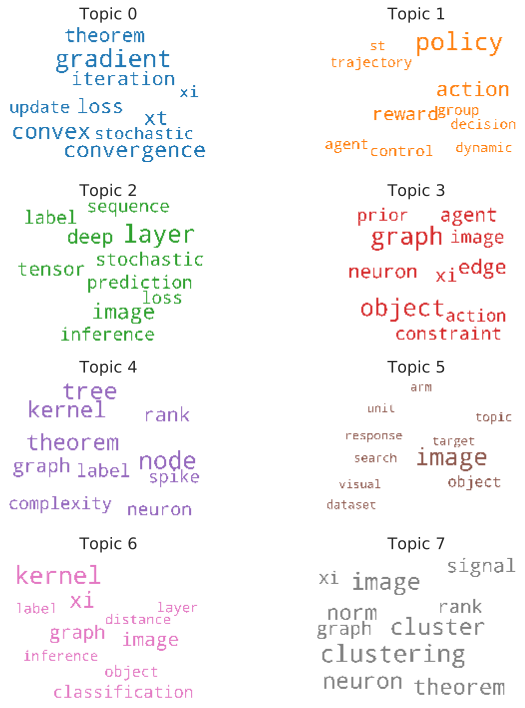

In [96]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True) # watch this value

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1]) # for 8 topics
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### 6.4)- Visualization through Topics' Bar-Plot

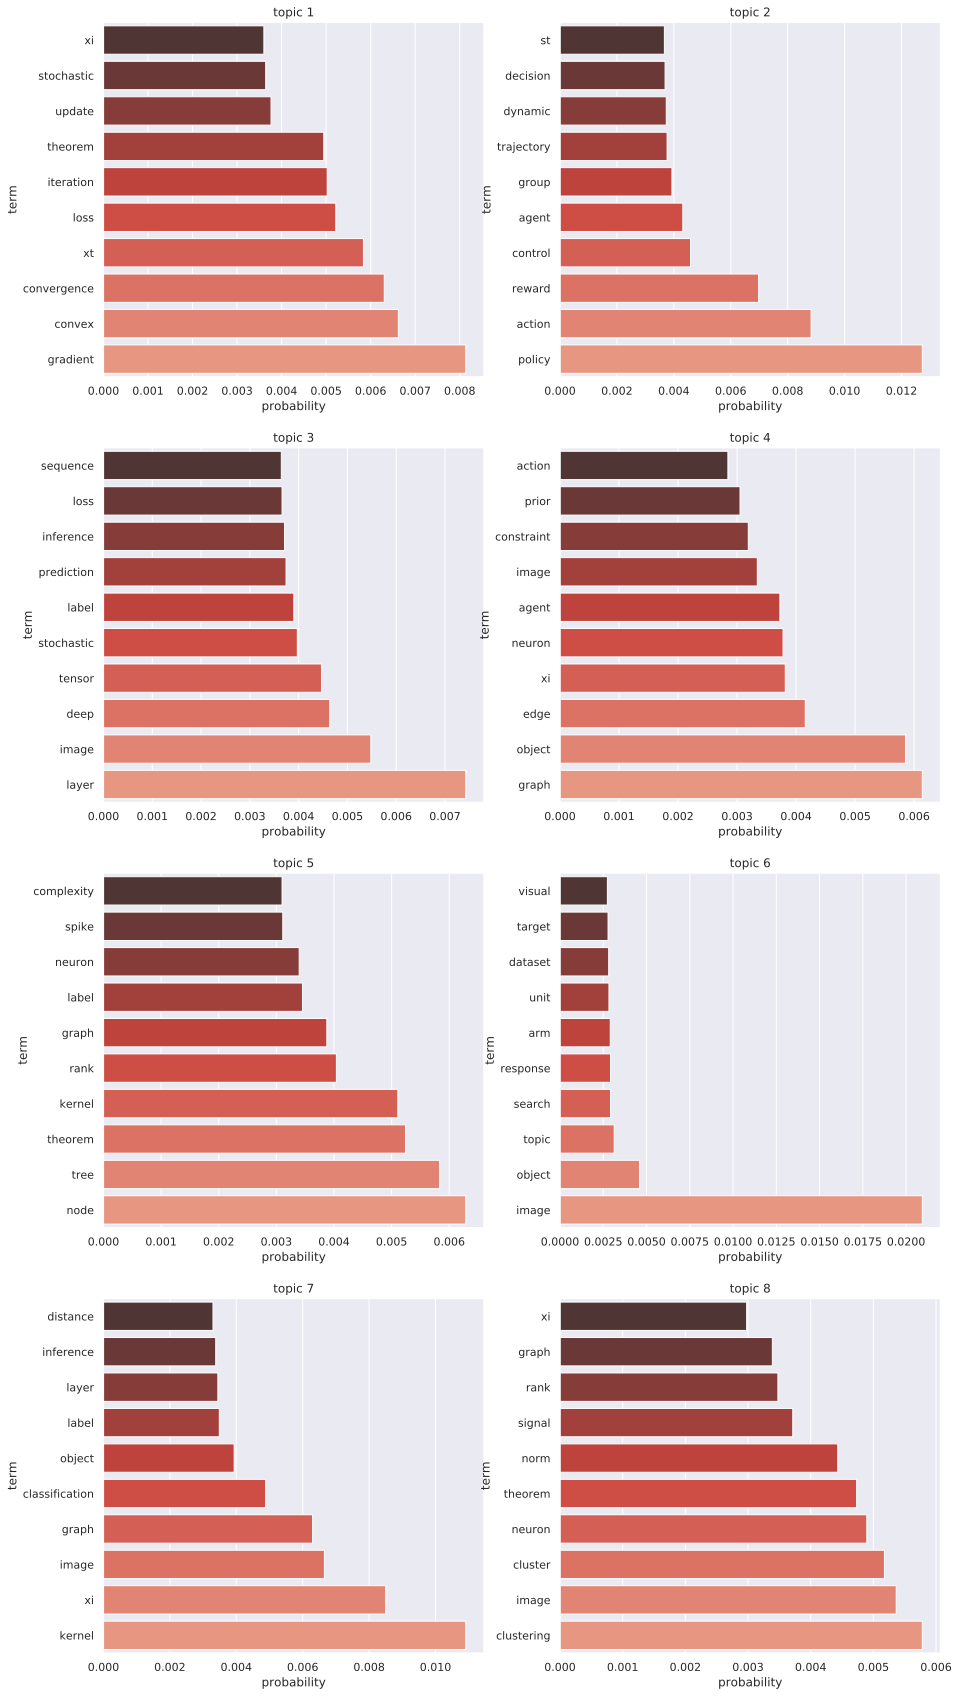

In [97]:
fiz=plt.figure(figsize=(15,30))
for i in range(8):
    df=pd.DataFrame(lda_model.show_topic(i), columns=['term','prob']).set_index('term')
    df=df.sort_values('prob')
    
    plt.subplot(4,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='patents', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()